In [10]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [11]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [12]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [13]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [14]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [15]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


In [16]:
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 7s - loss: 0.3741 - val_loss: 0.2722
Epoch 2/100
60000/60000 [==============================] - 6s - loss: 0.2649 - val_loss: 0.2543
Epoch 3/100
60000/60000 [==============================] - 5s - loss: 0.2436 - val_loss: 0.2307
Epoch 4/100
60000/60000 [==============================] - 5s - loss: 0.2223 - val_loss: 0.2119
Epoch 5/100
60000/60000 [==============================] - 5s - loss: 0.2065 - val_loss: 0.1990
Epoch 6/100
60000/60000 [==============================] - 5s - loss: 0.1955 - val_loss: 0.1898
Epoch 7/100
60000/60000 [==============================] - 5s - loss: 0.1874 - val_loss: 0.1826
Epoch 8/100
60000/60000 [==============================] - 5s - loss: 0.1809 - val_loss: 0.1765
Epoch 9/100
60000/60000 [==============================] - 5s - loss: 0.1752 - val_loss: 0.1712
Epoch 10/100
60000/60000 [==============================] - 5s - loss: 0.1701 - val_lo

60000/60000 [==============================] - 5s - loss: 0.0967 - val_loss: 0.0951
Epoch 86/100
60000/60000 [==============================] - 5s - loss: 0.0967 - val_loss: 0.0951
Epoch 87/100
60000/60000 [==============================] - 5s - loss: 0.0966 - val_loss: 0.0950
Epoch 88/100
60000/60000 [==============================] - 5s - loss: 0.0965 - val_loss: 0.0950
Epoch 89/100
60000/60000 [==============================] - 5s - loss: 0.0965 - val_loss: 0.0949
Epoch 90/100
60000/60000 [==============================] - 5s - loss: 0.0964 - val_loss: 0.0949
Epoch 91/100
60000/60000 [==============================] - 4s - loss: 0.0964 - val_loss: 0.0948
Epoch 92/100
60000/60000 [==============================] - 4s - loss: 0.0963 - val_loss: 0.0947
Epoch 93/100
60000/60000 [==============================] - 4s - loss: 0.0962 - val_loss: 0.0947
Epoch 94/100
60000/60000 [==============================] - 4s - loss: 0.0962 - val_loss: 0.0946
Epoch 95/100
60000/60000 [=================

In [17]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

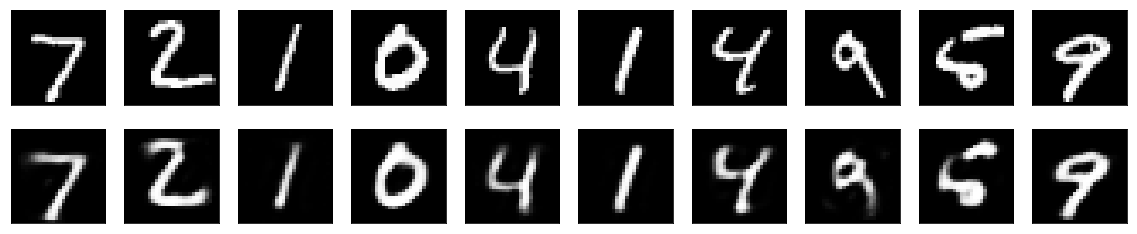

In [18]:
# use Matplotlib
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()